Importing Libraries
=

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

Importing Dataset
--

In [13]:
codsoft_3 = pd.read_csv("E:\\MSC Python\\Iris.csv")
codsoft_3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


MISSING VALUES
--

In [15]:
missing_values = codsoft_3.isnull()

In [7]:
missing_values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
codsoft_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
codsoft_3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [226]:
x = codsoft_3['sepal_length'].max()
y = codsoft_3['sepal_length'].min()
print(x)
print(y)

7.9
4.3


In [235]:
a = codsoft_3['sepal_width'].max()
b = codsoft_3['sepal_width'].min()
print(a)
print(b)

4.4
2.0


In [237]:
r = codsoft_3['petal_length'].max()
s = codsoft_3['petal_length'].min()
print(r)
print(s)

6.9
1.0


In [239]:
g = codsoft_3['petal_width'].max()
h = codsoft_3['petal_width'].min()
print(g)
print(h)

2.5
0.1


Correlation Heatmap
--

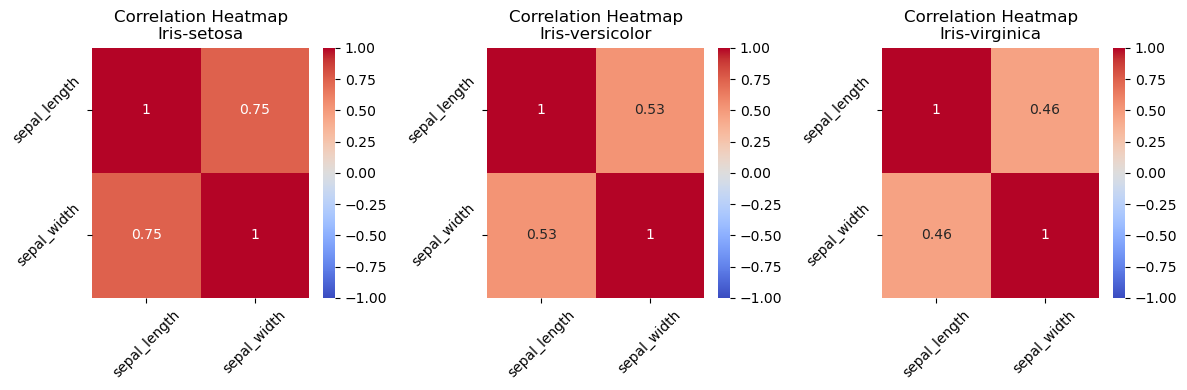

In [157]:
species_groups = codsoft_3.groupby('species')

# Initialize a figure for subplots
plt.figure(figsize=(12, 4))

# Loop through each species and calculate correlation
for idx, (species, group) in enumerate(species_groups):
    # Calculate the correlation matrix
    correlation_matrix = group[['sepal_length', 'sepal_width']].corr()
    
    # Create a subplot for the species
    plt.subplot(1, len(species_groups), idx + 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap\n{species}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

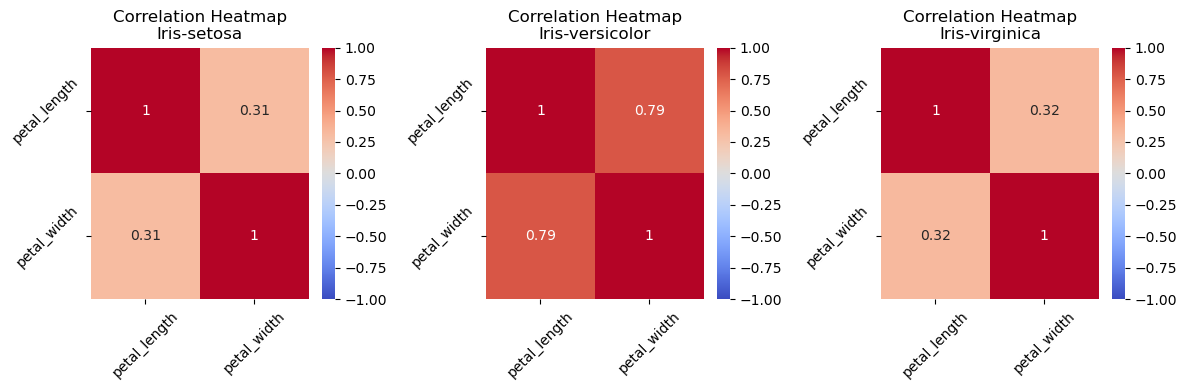

In [159]:
species_groups = codsoft_3.groupby('species')

# Initialize a figure for subplots
plt.figure(figsize=(12, 4))

# Loop through each species and calculate correlation
for idx, (species, group) in enumerate(species_groups):
    # Calculate the correlation matrix
    correlation_matrix = group[['petal_length', 'petal_width']].corr()
    
    # Create a subplot for the species
    plt.subplot(1, len(species_groups), idx + 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap\n{species}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Pairplots to observe the distribution of the features for each species.
-

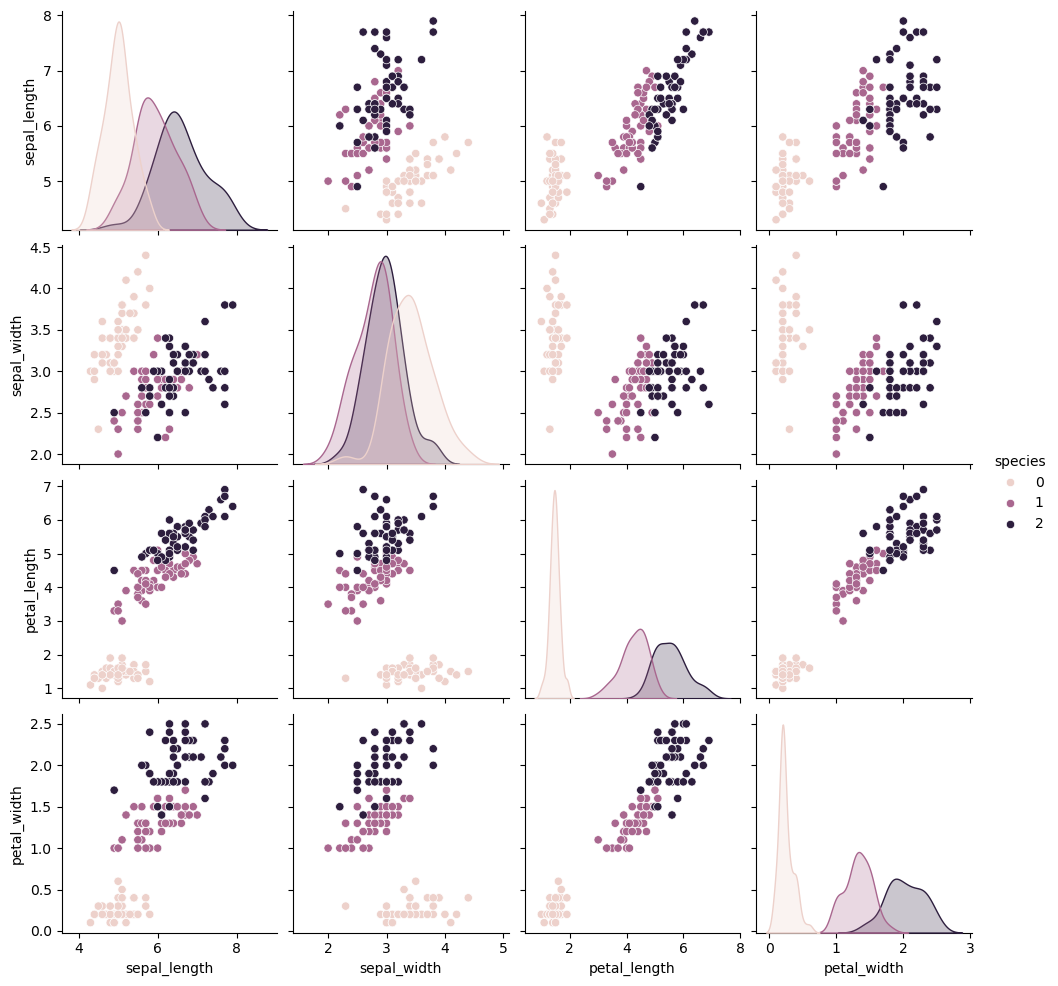

In [218]:
sns.pairplot(codsoft_3, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [161]:
def count_species_by_feature(feature, bins):
    # Bin the feature values into specified intervals
    codsoft_3[f'{feature}_bin'] = pd.cut(codsoft_3[feature], bins=bins)
    # Group by species and the binned feature
    grouped = codsoft_3.groupby(['species', f'{feature}_bin']).size().reset_index(name='Count')
    return grouped
# Define bins for each feature
sepal_length_bins = [4.3, 7.9]
sepal_width_bins = [2.0, 4.4]
petal_length_bins = [1.0, 6.9]
petal_width_bins = [0.1, 2.5]

# Get counts for each feature
sepal_length_counts = count_species_by_feature('sepal_length', sepal_length_bins)
sepal_width_counts = count_species_by_feature('sepal_width', sepal_width_bins)
petal_length_counts = count_species_by_feature('petal_length', petal_length_bins)
petal_width_counts = count_species_by_feature('petal_width', petal_width_bins)

# Display results
print("Counts for Sepal Length:")
print(sepal_length_counts)
print("\nCounts for Sepal Width:")
print(sepal_width_counts)
print("\nCounts for Petal Length:")
print(petal_length_counts)
print("\nCounts for Petal Width:")
print(petal_width_counts)


Counts for Sepal Length:
           species sepal_length_bin  Count
0      Iris-setosa       (4.3, 7.9]     49
1  Iris-versicolor       (4.3, 7.9]     50
2   Iris-virginica       (4.3, 7.9]     50

Counts for Sepal Width:
           species sepal_width_bin  Count
0      Iris-setosa      (2.0, 4.4]     50
1  Iris-versicolor      (2.0, 4.4]     49
2   Iris-virginica      (2.0, 4.4]     50

Counts for Petal Length:
           species petal_length_bin  Count
0      Iris-setosa       (1.0, 6.9]     49
1  Iris-versicolor       (1.0, 6.9]     50
2   Iris-virginica       (1.0, 6.9]     50

Counts for Petal Width:
           species petal_width_bin  Count
0      Iris-setosa      (0.1, 2.5]     44
1  Iris-versicolor      (0.1, 2.5]     50
2   Iris-virginica      (0.1, 2.5]     50


C:\Users\VISHWA\AppData\Local\Temp\ipykernel_21820\2901949282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = codsoft_3.groupby(['species', f'{feature}_bin']).size().reset_index(name='Count')
C:\Users\VISHWA\AppData\Local\Temp\ipykernel_21820\2901949282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = codsoft_3.groupby(['species', f'{feature}_bin']).size().reset_index(name='Count')
C:\Users\VISHWA\AppData\Local\Temp\ipykernel_21820\2901949282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

Scatter Plot
==

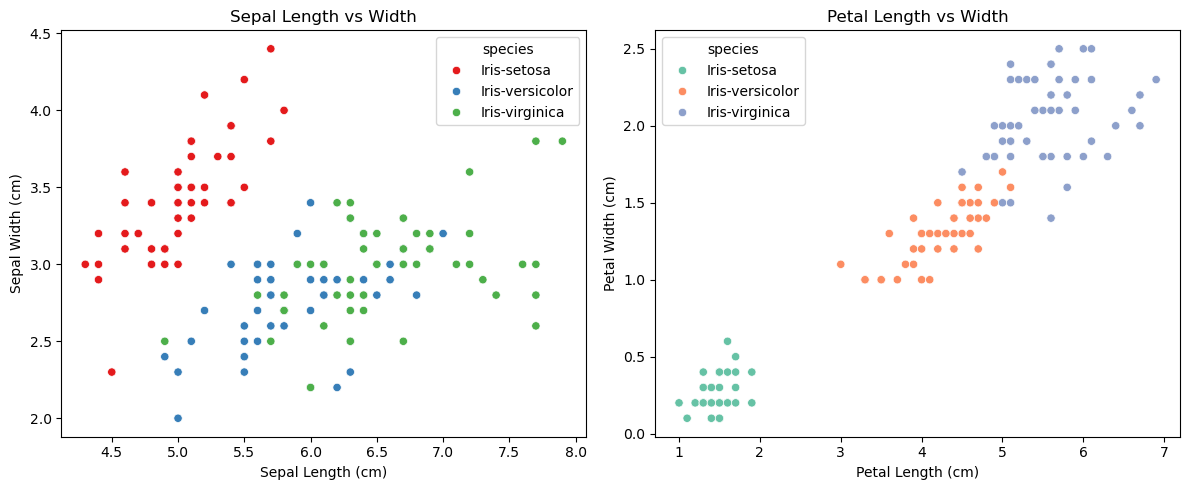

In [163]:
# Create scatter plots for Sepal dimensions
plt.figure(figsize=(12, 5))

# Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
sns.scatterplot(data=codsoft_3, x='sepal_length', y='sepal_width', hue='species', palette='Set1')
plt.title('Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Petal Length vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(data=codsoft_3, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.title('Petal Length vs Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Display the plots
plt.tight_layout()
plt.show()


LOGISTIC MODEL
--

In [176]:
# Encode the Species column to numerical values
le = LabelEncoder()
codsoft_3['species'] = le.fit_transform(codsoft_3['species'])

In [188]:
X = codsoft_3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = codsoft_3['species']  # Target

In [190]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [204]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=85)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=85)

In [208]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

